![image info](https://ineuron.ai/images/ineuron-logo.png)

### OUTLIERS DETECTION & REMOVAL approaches
* Identifying outliers with visualization
* Z-score method
* Interquartile Range Method( IQR ) method
* Compare Skewness

### Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [7]:
df = pd.read_csv(r'C:\5-Days-Live-EDA-and-Feature-Engineering-main\student_performance\student_performance\data\student.csv')

### 1. Identifying outliers with visualization

In [8]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]
num_df.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


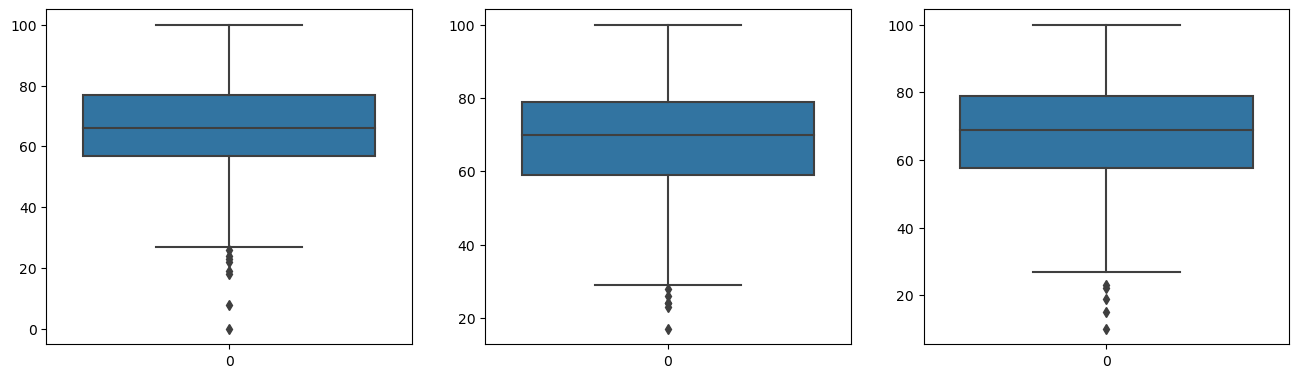

In [9]:
plt.figure(figsize=(50,20))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

In [11]:
for i,col in enumerate(num_df.columns):
    print(i,end='')
    print(col,end=' ')
    print(col)

0math score math score
1reading score reading score
2writing score writing score


In [5]:
for i in range(5):
    print(i, end='')
    print('*',end='*')


0**1**2**3**4**

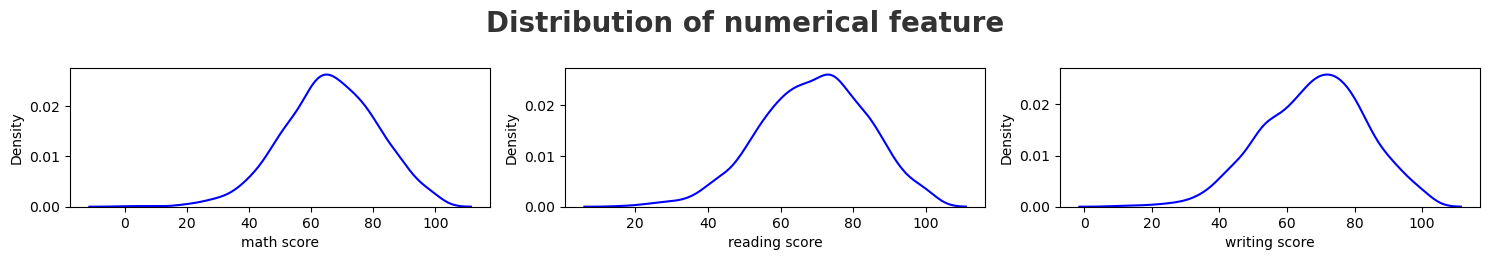

In [10]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Insigths
- The outliers are there ,as there are many data points which lie far away from maximum points.

In [11]:
obj = ['race/ethnicity','parental level of education','lunch','test preparation course','gender']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
x = df.drop(obj,axis = 1)
for i in x.columns:
    count_outliers(x,i)

There are outliers in math score
Count of outliers are: 8
There are outliers in reading score
Count of outliers are: 6
There are outliers in writing score
Count of outliers are: 5


### 2 .  Z-score  method
#### Z-score:
- The number of standard deviations away from the mean that a particular observation is.
- A negative Z-score means an observation is below the mean.
- while a positive Z-score means means it above the mean.
- The further away from 0 the Z-Score is, the further away from the mean your observation is.

In [12]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [14]:
## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [15]:
replace_with_thresholds(num_df, num_df.columns)

In [22]:
low_limit=27

In [16]:
num_df.loc[(num_df['math score']<25),'math score']=low_limit

NameError: name 'low_limit' is not defined

In [25]:
num_df[num_df['math score']<25]

,math score,reading score,writing score


In [ ]:
dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit

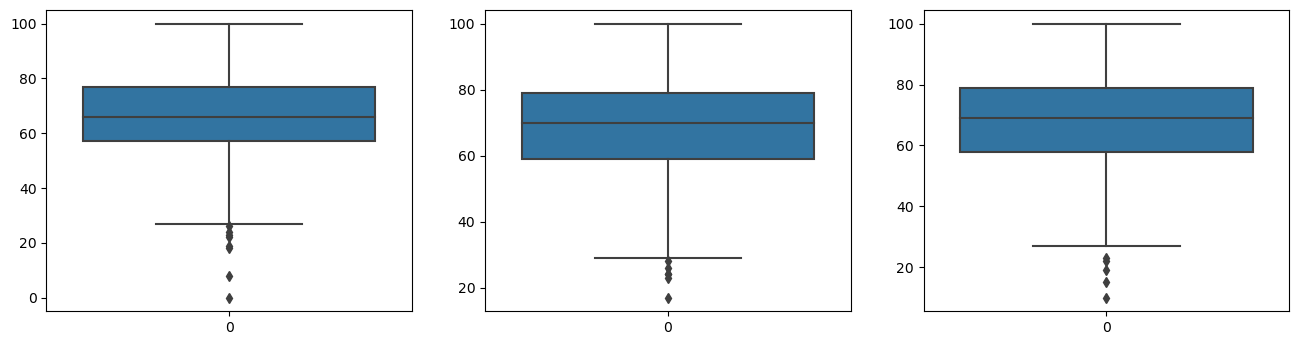

In [17]:
plt.figure(figsize=(50,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

#### Insights
- As we can see from above boxplots outliers are not removed properly

### 3.  Interquartile Range Method( IQR ) method

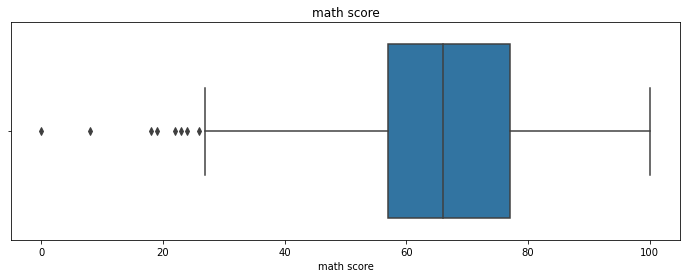

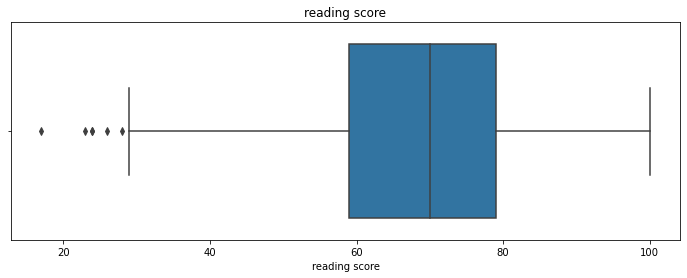

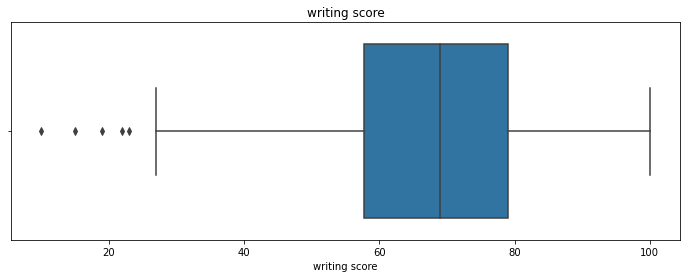

In [18]:
for col in num_df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)

In [18]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [19]:
remove_outliers_IQR('math score')

percentile25 57.0
percentile75 77.0
Upper limit 107.0
Lower limit 27.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [20]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

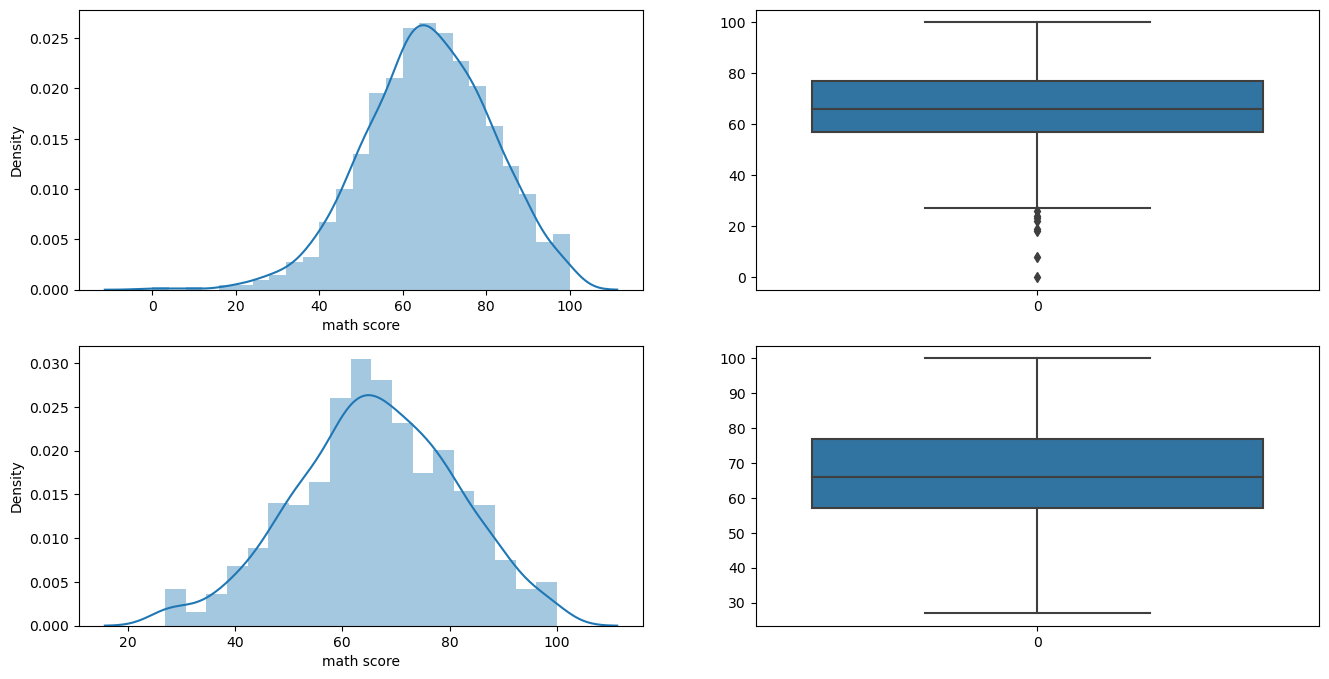

In [21]:
create_comparison_plot(df,df1,"math score")

In [22]:
remove_outliers_IQR('reading score')

percentile25 59.0
percentile75 79.0
Upper limit 109.0
Lower limit 29.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


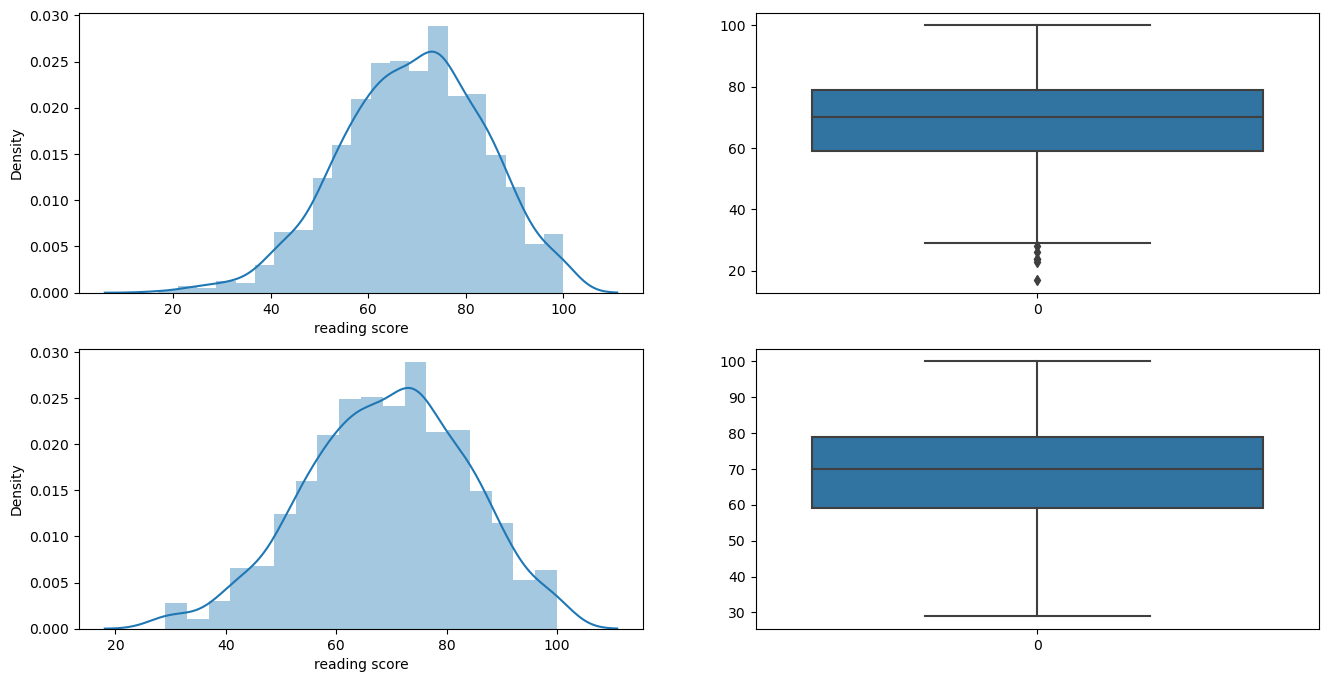

In [23]:
create_comparison_plot(df,df1,"reading score")

In [24]:
remove_outliers_IQR('writing score')

percentile25 57.75
percentile75 79.0
Upper limit 110.875
Lower limit 25.875


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


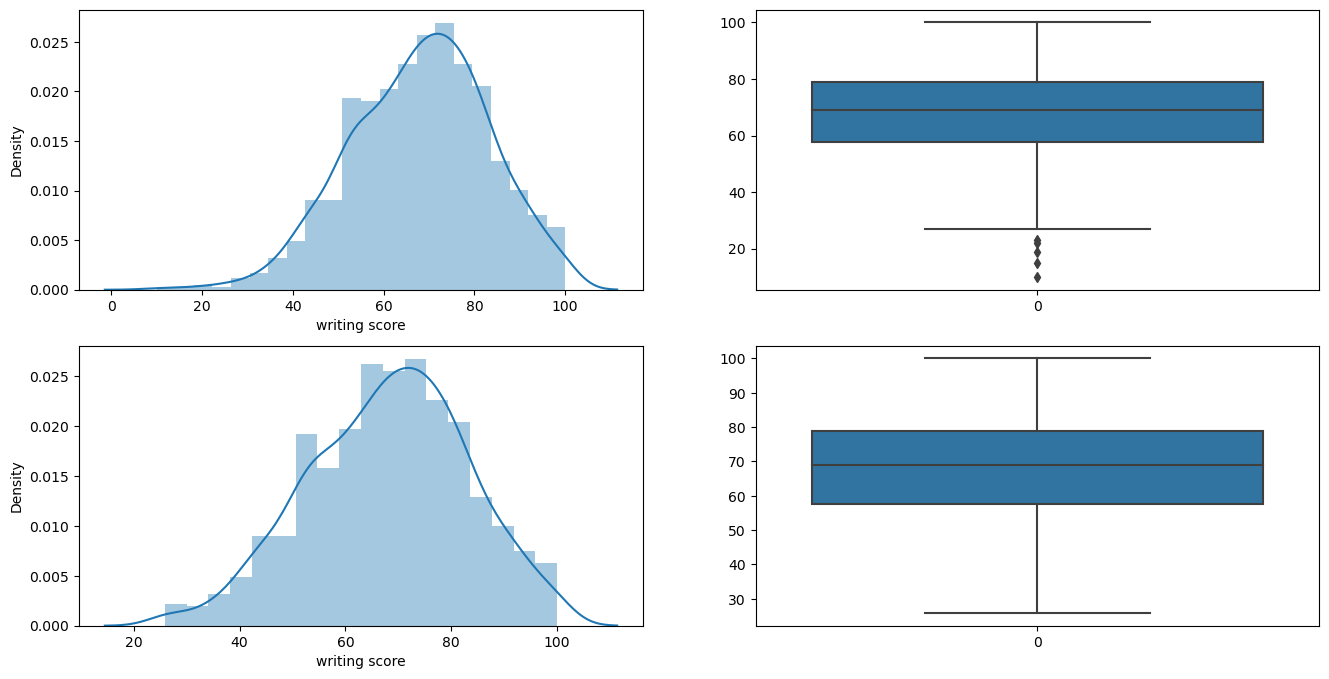

In [25]:
create_comparison_plot(df,df1,"writing score")

### 4. Compare Skewness

In [26]:
df.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [27]:
df1.skew()

math score      -0.148833
reading score   -0.209790
writing score   -0.223701
dtype: float64

#### Insights
- Skewness is reduced after we have removed ouliers using IQR Method

In [30]:
df.to_csv('outlier_removed.csv', index=False)